## EDA RFM Analysis with Kmeans Cluster

In [52]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [53]:
# Data reading
sale=pd.read_csv(r"data\sale_data.csv",encoding='iso-8859-1')
# Convert the 'InvoiceDate' column to datetime format, specifying the date format
sale['InvoiceDate'] = pd.to_datetime(sale['InvoiceDate'], format='%d-%m-%Y %H:%M', errors='coerce')
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [54]:
sale_data=sale.copy()

In [55]:
sale_data[sale_data['Customer ID'].isna()].head()

Invoice StockCode                      Description  Quantity  \
622   536414     22139                              NaN        56   
1443  536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444  536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445  536544     21786               POLKADOT RAIN HAT          4   
1446  536544     21787            RAIN PONCHO RETROSPOT         2   

             InvoiceDate  Price  Customer ID         Country  
622  2010-12-01 11:52:00   0.00          NaN  United Kingdom  
1443 2010-12-01 14:32:00   2.51          NaN  United Kingdom  
1444 2010-12-01 14:32:00   2.51          NaN  United Kingdom  
1445 2010-12-01 14:32:00   0.85          NaN  United Kingdom  
1446 2010-12-01 14:32:00   1.66          NaN  United Kingdom

In [56]:
sale_data[sale_data['Quantity']<0].head(5)

Invoice StockCode                       Description  Quantity  \
141  C536379         D                          Discount        -1   
154  C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235  C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236  C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237  C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  Price  Customer ID         Country  
141 2010-12-01 09:41:00  27.50      14527.0  United Kingdom  
154 2010-12-01 09:49:00   4.65      15311.0  United Kingdom  
235 2010-12-01 10:24:00   1.65      17548.0  United Kingdom  
236 2010-12-01 10:24:00   0.29      17548.0  United Kingdom  
237 2010-12-01 10:24:00   0.29      17548.0  United Kingdom

In [57]:
sale_data['Invoice']=sale_data['Invoice'].astype(str)
sale_data[sale_data['Invoice'].str.match("^\\d{6}$")==False].head()

Invoice StockCode                       Description  Quantity  \
141  C536379         D                          Discount        -1   
154  C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235  C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236  C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237  C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  Price  Customer ID         Country  
141 2010-12-01 09:41:00  27.50      14527.0  United Kingdom  
154 2010-12-01 09:49:00   4.65      15311.0  United Kingdom  
235 2010-12-01 10:24:00   1.65      17548.0  United Kingdom  
236 2010-12-01 10:24:00   0.29      17548.0  United Kingdom  
237 2010-12-01 10:24:00   0.29      17548.0  United Kingdom

In [58]:
sale_data['Invoice'].str.replace('[0-9]','',regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [59]:
sale_data[sale_data['Invoice'].str.startswith('A')]

Invoice StockCode      Description  Quantity         InvoiceDate  \
299982  A563185         B  Adjust bad debt         1 2011-08-12 14:50:00   
299983  A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984  A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

           Price  Customer ID         Country  
299982  11062.06          NaN  United Kingdom  
299983 -11062.06          NaN  United Kingdom  
299984 -11062.06          NaN  United Kingdom

In [60]:
cleaned_df=sale_data.copy()

In [61]:
cleaned_df['Invoice']=cleaned_df['Invoice'].astype("str")
mask=(
    cleaned_df['Invoice'].str.match('^\\d{6}$')==True
)
cleaned_df=cleaned_df[mask]
cleaned_df

Invoice StockCode                          Description  Quantity  \
0       536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365     71053                  WHITE METAL LANTERN         6   
2       536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3       536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...        ...       ...                                  ...       ...   
541905  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
541909  581587      POST                              POSTAGE         1   

               InvoiceDate  Price  Customer ID         Country  
0      2010-12-01 08:26:00   2.55      17850.0  United Kingdom  
1      2010-12-01 08:26:00   3.39      17850.0  United Kingdom  
2      2010-12-01 08:26:00   2.75      17850.0  United Kingdom  
3      2010-12-01 08:26:00   3.39      17850.0  United Kingdom  
4      2010-12-01 08:26:00   3.39      17850.0  United Kingdom  
...                    ...    ...          ...             ...  
541905 2011-12-09 12:50:00   2.10      12680.0          France  
541906 2011-12-09 12:50:00   4.15      12680.0          France  
541907 2011-12-09 12:50:00   4.15      12680.0          France  
541908 2011-12-09 12:50:00   4.95      12680.0          France  
541909 2011-12-09 12:50:00  18.00      12680.0          France  

[532619 rows x 8 columns]

In [62]:
cleaned_df['StockCode']=cleaned_df['StockCode'].astype("str")
mask=(
    (cleaned_df['StockCode'].str.match('^\\d{5}$')==True)|
    (cleaned_df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$')==True)|
    (cleaned_df['StockCode'].str.match('^PADS$')==True)    
)
cleaned_df=cleaned_df[mask]
cleaned_df.head()

Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                  WHITE METAL LANTERN         6   
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  Price  Customer ID         Country  
0 2010-12-01 08:26:00   2.55      17850.0  United Kingdom  
1 2010-12-01 08:26:00   3.39      17850.0  United Kingdom  
2 2010-12-01 08:26:00   2.75      17850.0  United Kingdom  
3 2010-12-01 08:26:00   3.39      17850.0  United Kingdom  
4 2010-12-01 08:26:00   3.39      17850.0  United Kingdom

In [63]:
cleaned_df.dropna(subset=['Customer ID'],inplace=True)
cleaned_df.describe()

C:\Users\yohannanpc\AppData\Local\Temp\ipykernel_8692\280422381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=['Customer ID'],inplace=True)


Quantity                    InvoiceDate          Price  \
count  396374.000000                         396374  396374.000000   
mean       13.046353  2011-07-11 00:04:48.847805440       2.867954   
min         1.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-07 11:16:00       1.250000   
50%         6.000000            2011-07-31 14:39:00       1.950000   
75%        12.000000            2011-10-20 14:41:00       3.750000   
max     80995.000000            2011-12-09 12:50:00     649.500000   
std       180.732689                            NaN       4.264554   

         Customer ID  
count  396374.000000  
mean    15301.603824  
min     12346.000000  
25%     13975.000000  
50%     15159.000000  
75%     16803.000000  
max     18287.000000  
std      1709.976485

In [64]:
cleaned_df=cleaned_df[cleaned_df["Price"]>0]
cleaned_df.head()

Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                  WHITE METAL LANTERN         6   
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  Price  Customer ID         Country  
0 2010-12-01 08:26:00   2.55      17850.0  United Kingdom  
1 2010-12-01 08:26:00   3.39      17850.0  United Kingdom  
2 2010-12-01 08:26:00   2.75      17850.0  United Kingdom  
3 2010-12-01 08:26:00   3.39      17850.0  United Kingdom  
4 2010-12-01 08:26:00   3.39      17850.0  United Kingdom

In [65]:
cleaned_df.describe()

Quantity                    InvoiceDate          Price  \
count  396340.000000                         396340  396340.000000   
mean       13.012456  2011-07-11 00:04:40.164908544       2.868200   
min         1.000000            2010-12-01 08:26:00       0.001000   
25%         2.000000            2011-04-07 11:16:00       1.250000   
50%         6.000000            2011-07-31 14:39:00       1.950000   
75%        12.000000            2011-10-20 14:41:00       3.750000   
max     80995.000000            2011-12-09 12:50:00     649.500000   
std       179.640568                            NaN       4.264654   

         Customer ID  
count  396340.000000  
mean    15301.689070  
min     12346.000000  
25%     13975.000000  
50%     15159.000000  
75%     16803.000000  
max     18287.000000  
std      1709.957487

In [66]:
droped_data=1-(len(cleaned_df)/len(sale_data))

In [67]:
f"droped {np.round(droped_data,2)*100}% data"

'droped 27.0% data'

# Feature Engineering

In [68]:
cleaned_df.head(2)

Invoice StockCode                         Description  Quantity  \
0  536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                 WHITE METAL LANTERN         6   

          InvoiceDate  Price  Customer ID         Country  
0 2010-12-01 08:26:00   2.55      17850.0  United Kingdom  
1 2010-12-01 08:26:00   3.39      17850.0  United Kingdom

In [69]:
cleaned_df['Sale_Value']=cleaned_df.Quantity*cleaned_df.Price

In [70]:
# RFM Grouping
aggregated_df=cleaned_df.groupby(by='Customer ID',as_index=False).agg(
    Monetary=("Sale_Value","sum"),
    Frequency=("Invoice","nunique"),
    LastInvoiceDate=("InvoiceDate","max")
)
aggregated_df.head()

Customer ID  Monetary  Frequency     LastInvoiceDate
0      12346.0  77183.60          1 2011-01-18 10:01:00
1      12347.0   4310.00          7 2011-12-07 15:52:00
2      12348.0   1437.24          4 2011-09-25 13:13:00
3      12349.0   1457.55          1 2011-11-21 09:51:00
4      12350.0    294.40          1 2011-02-02 16:01:00

In [71]:
# findout last date in saledata
max_date=aggregated_df.LastInvoiceDate.max()
max_date

Timestamp('2011-12-09 12:50:00')

In [72]:
# Recency calculation
aggregated_df['Recency']=(max_date-aggregated_df['LastInvoiceDate']).dt.days

In [73]:
aggregated_df.head()

Customer ID  Monetary  Frequency     LastInvoiceDate  Recency
0      12346.0  77183.60          1 2011-01-18 10:01:00      325
1      12347.0   4310.00          7 2011-12-07 15:52:00        1
2      12348.0   1437.24          4 2011-09-25 13:13:00       74
3      12349.0   1457.55          1 2011-11-21 09:51:00       18
4      12350.0    294.40          1 2011-02-02 16:01:00      309

In [74]:
RFM_colums=list(["Monetary","Frequency","Recency"])
RFM_colums

['Monetary', 'Frequency', 'Recency']

In [75]:
RFM_data=aggregated_df[RFM_colums]
RFM_data

Monetary  Frequency  Recency
0     77183.60          1      325
1      4310.00          7        1
2      1437.24          4       74
3      1457.55          1       18
4       294.40          1      309
...        ...        ...      ...
4329    180.60          1      277
4330     80.82          1      180
4331    178.05          2        7
4332   2088.93         16        3
4333   1837.28          3       42

[4334 rows x 3 columns]

In [76]:
colors = ['skyblue', 'lightgreen', 'salmon']

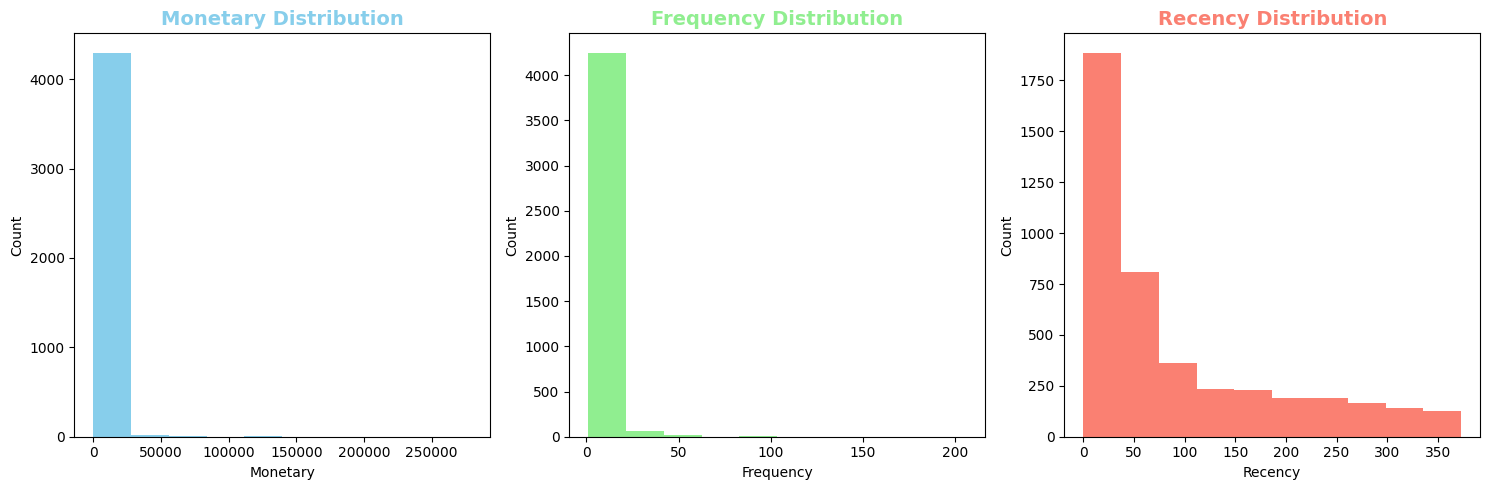

In [77]:
# check the distribution of the data in histogram
plt.figure(figsize=(15,5))
for index, name in enumerate(RFM_colums):    
    plt.subplot(1,3,index+1)
    plt.hist(RFM_data[name],color=colors[index % len(colors)])
    plt.title(f"{name} Distribution",color=colors[index %len(colors)],fontweight='bold',fontsize=14)
    plt.xlabel(f"{name}")
    plt.ylabel(f"Count")
plt.tight_layout()
plt.show()
    


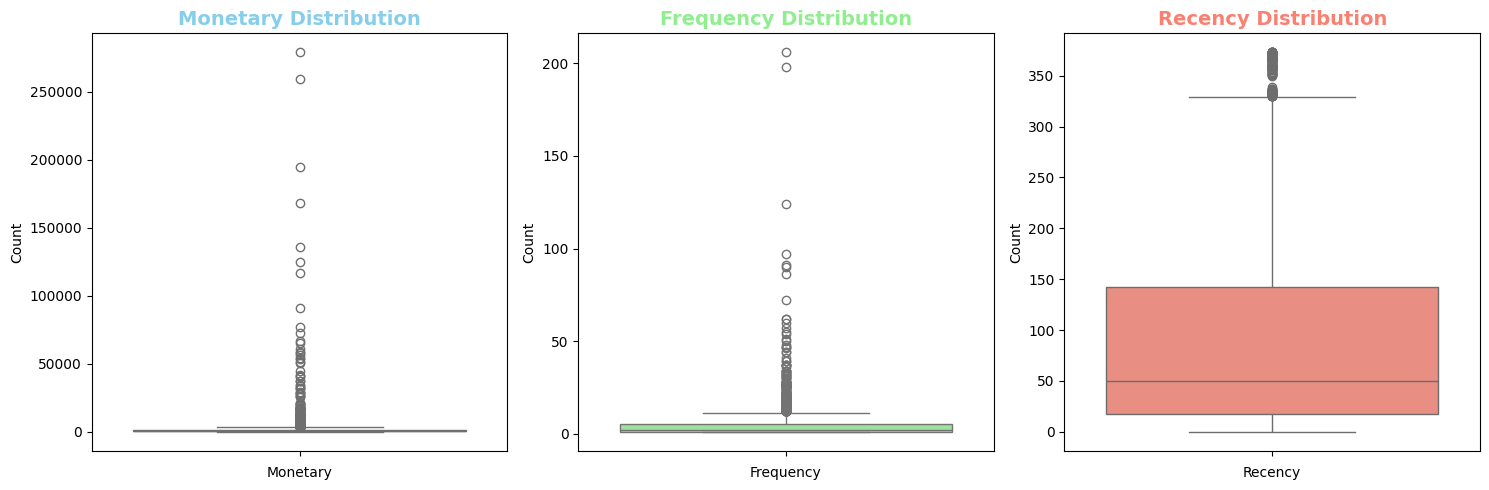

In [78]:
# check the outlier of the data in boxplot
plt.figure(figsize=(15,5))
for index, name in enumerate(RFM_colums):    
    plt.subplot(1,3,index+1)
    sns.boxplot(RFM_data[name],color=colors[index % len(colors)])
    plt.title(f"{name} Distribution",color=colors[index %len(colors)],fontweight='bold',fontsize=14)
    plt.xlabel(f"{name}")
    plt.ylabel(f"Count")
plt.tight_layout()
plt.show()

In [79]:
# non-outlier data separation
def non_outlier_calculation(RFM_data):
    limits=[]
    
    for i in RFM_data:
        if i!="Recency":
            Q1=RFM_data[i].quantile(0.25)
            Q3=RFM_data[i].quantile(0.75)
            IQR=Q3-Q1
            lower_bound=Q1-(1.5*IQR)
            upper_bound=Q3+(1.5*IQR)
            limits.append({"RFM_Params":i,"Lower_Bound":lower_bound,"Upper_Bound":upper_bound,"IQR":IQR})
    quantile_cal=pd.DataFrame(limits)
    Monetary_L_Bound=quantile_cal.loc[quantile_cal['RFM_Params']=='Monetary','Lower_Bound']
    Monetary_U_Bound=quantile_cal.loc[quantile_cal['RFM_Params']=='Monetary','Upper_Bound']
    
    Frequency_L_Bound=quantile_cal.loc[quantile_cal['RFM_Params']=='Frequency','Lower_Bound']
    Frequency_U_Bound=quantile_cal.loc[quantile_cal['RFM_Params']=='Frequency','Upper_Bound']
    
    M_Outlier_DF=RFM_data[(RFM_data['Monetary']<Monetary_L_Bound[0])|(RFM_data['Monetary']>Monetary_U_Bound[0])]
    F_Outlier_DF=RFM_data[(RFM_data['Frequency']<Frequency_L_Bound[1])|(RFM_data['Frequency']>Frequency_U_Bound[1])]
    Non_Outlier_Data=RFM_data[(~RFM_data.index.isin(M_Outlier_DF.index))&(~RFM_data.index.isin(F_Outlier_DF.index))]
    return Non_Outlier_Data,M_Outlier_DF,F_Outlier_DF


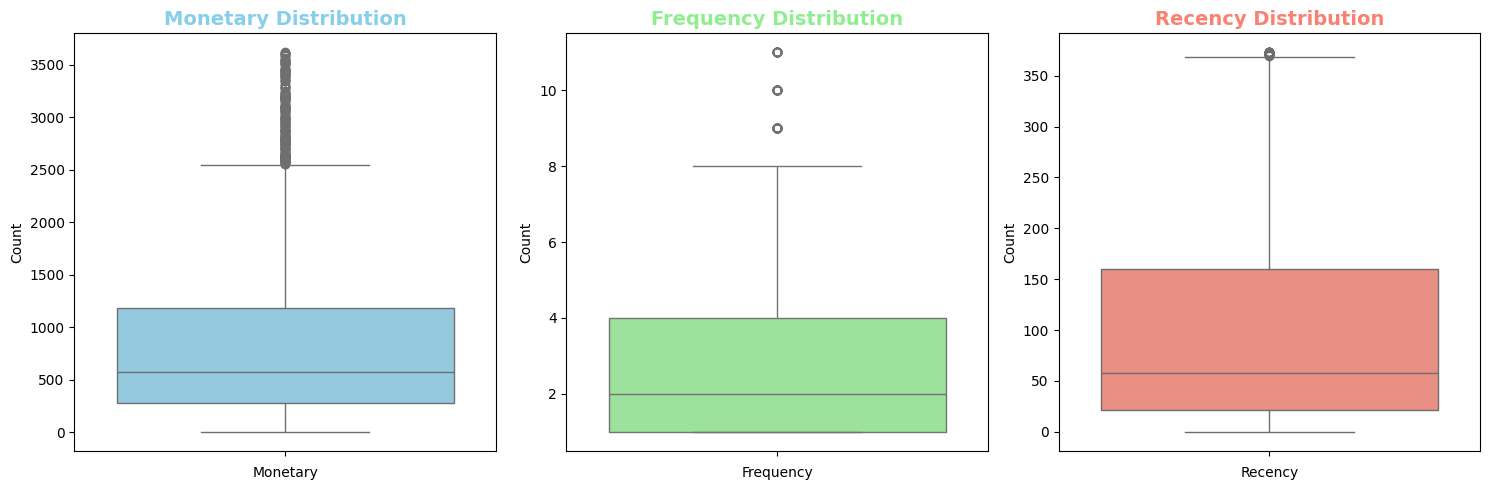

In [ ]:
# check Non-outlier data in box plot
Non_Outlier_Data,_,_=non_outlier_calculation(RFM_data)
plt.figure(figsize=(15,5))
for index, name in enumerate(RFM_colums):    
    plt.subplot(1,3,index+1)
    sns.boxplot(Non_Outlier_Data[name],color=colors[index % len(colors)])
    plt.title(f"{name} Distribution",color=colors[index %len(colors)],fontweight='bold',fontsize=14)
    plt.xlabel(f"{name}")
    plt.ylabel(f"Count")
plt.tight_layout()
plt.show()

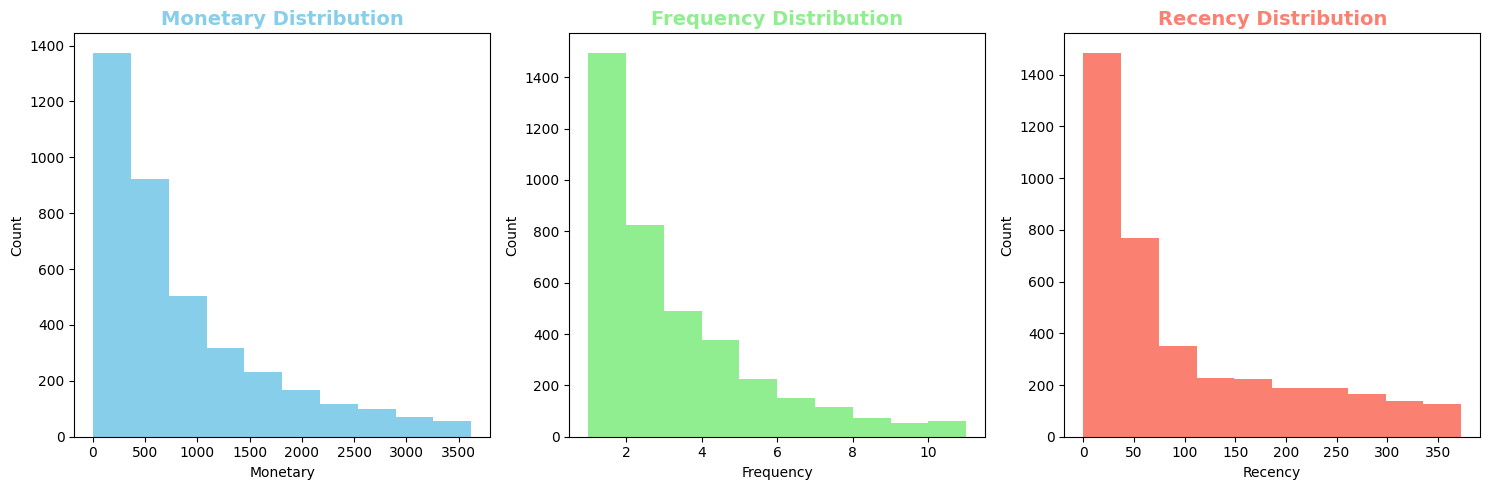

In [81]:
# check non-outlier data distribution in histogram
plt.figure(figsize=(15,5))
for index, name in enumerate(RFM_colums):    
    plt.subplot(1,3,index+1)
    plt.hist(Non_Outlier_Data[name],color=colors[index % len(colors)])
    plt.title(f"{name} Distribution",color=colors[index %len(colors)],fontweight='bold',fontsize=14)
    plt.xlabel(f"{name}")
    plt.ylabel(f"Count")
plt.tight_layout()
plt.show()

In [82]:
# feature scaling
scalar=StandardScaler()
scaled_data=scalar.fit_transform(Non_Outlier_Data)
scaled_data=pd.DataFrame(scaled_data,columns=['Monetary','Frequency','Recency'],index=Non_Outlier_Data.index)
scaled_data

Monetary  Frequency   Recency
2     0.734326   0.574252 -0.254717
3     0.759889  -0.809612 -0.804526
4    -0.704104  -0.809612  2.052518
5     0.669505   1.958116 -0.637620
6    -0.962630  -0.809612  1.011808
...        ...        ...       ...
4328 -0.855771  -0.809612 -0.264535
4329 -0.847338  -0.809612  1.738342
4330 -0.972926  -0.809612  0.785993
4331 -0.850547  -0.348324 -0.912525
4333  1.237834   0.112964 -0.568894

[3863 rows x 3 columns]

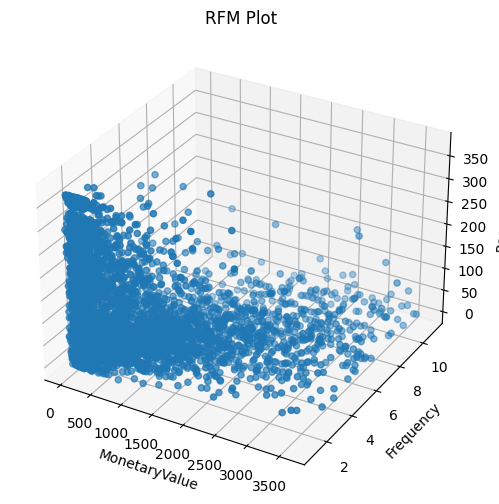

In [83]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(projection='3d')
scatter=ax.scatter(Non_Outlier_Data['Monetary'],Non_Outlier_Data['Frequency'],Non_Outlier_Data['Recency'])
ax.set_xlabel("MonetaryValue")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")
ax.set_title("RFM Plot")
plt.show()

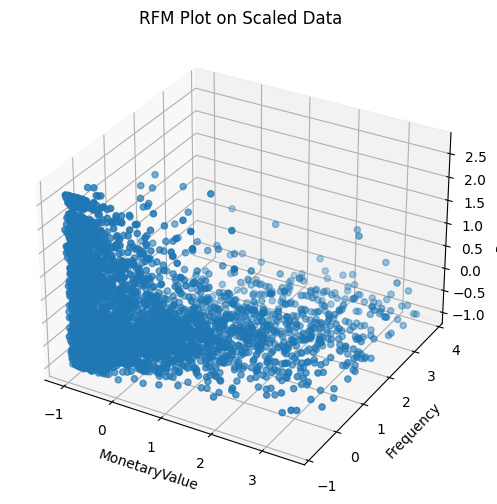

In [84]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(projection='3d')
scatter=ax.scatter(scaled_data['Monetary'],scaled_data['Frequency'],scaled_data['Recency'])
ax.set_xlabel("MonetaryValue")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")
ax.set_title("RFM Plot on Scaled Data")
plt.show()

d:\Customer_Segmentation_V02\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Customer_Segmentation_V02\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Customer_Segmentation_V02\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Customer_Segmentation_V02\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

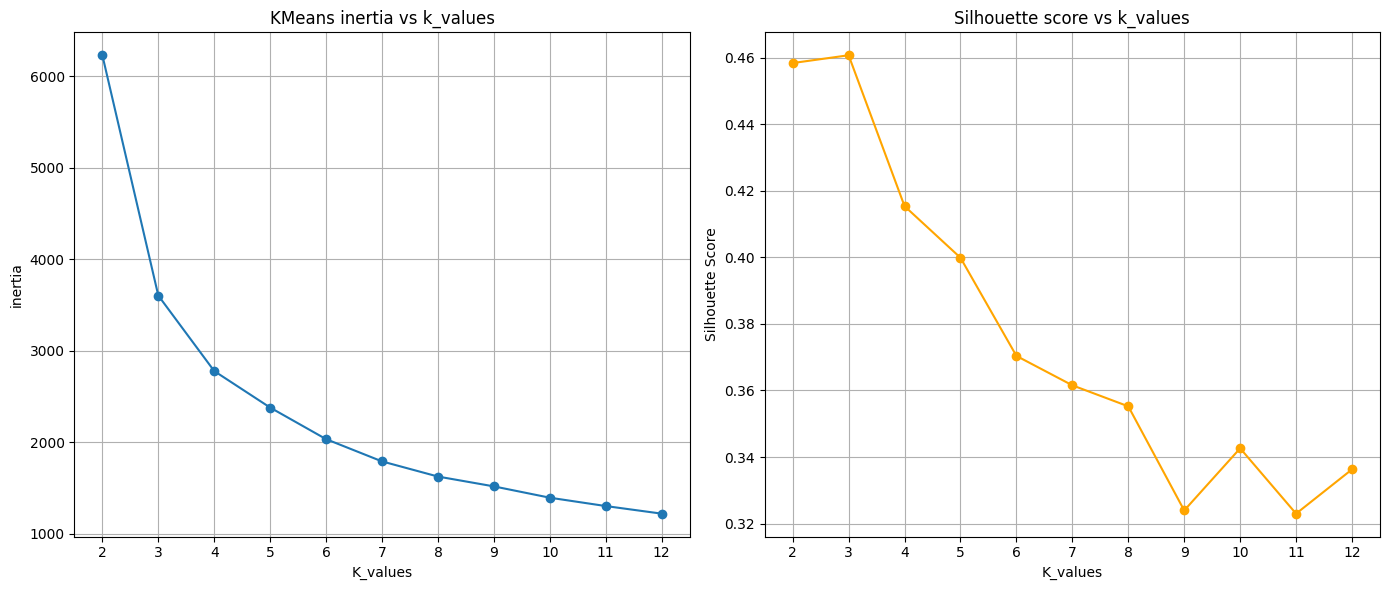

In [85]:
# kmeans inertia and silhouette score vs K_values
max_k=12
inertia=[]
silhouette_scores=[]
k_values=range(2,max_k+1)
for k in k_values:
    kmeans=KMeans(n_clusters=k,max_iter=1000,random_state=42)
    cluster_label=kmeans.fit_predict(scaled_data)
    sil_score=silhouette_score(scaled_data,cluster_label)
    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(k_values,inertia,marker='o')
plt.title("KMeans inertia vs k_values" )
plt.xlabel("K_values")
plt.ylabel("inertia")
plt.xticks(k_values)
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(k_values,silhouette_scores,marker='o',color='orange')
plt.title("Silhouette score vs k_values" )
plt.xlabel("K_values")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()

In [86]:
kmeans=KMeans(n_clusters=4,random_state=42,max_iter=1000)
cluster_label=kmeans.fit_predict(scaled_data)
cluster_label

d:\Customer_Segmentation_V02\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([3, 0, 1, ..., 1, 0, 3])

In [87]:
Non_Outlier_Data['Cluster']=cluster_label
Non_Outlier_Data.head()

C:\Users\yohannanpc\AppData\Local\Temp\ipykernel_8692\3264758030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Non_Outlier_Data['Cluster']=cluster_label


Monetary  Frequency  Recency  Cluster
2   1437.24          4       74        3
3   1457.55          1       18        0
4    294.40          1      309        1
5   1385.74          7       35        2
6     89.00          1      203        1

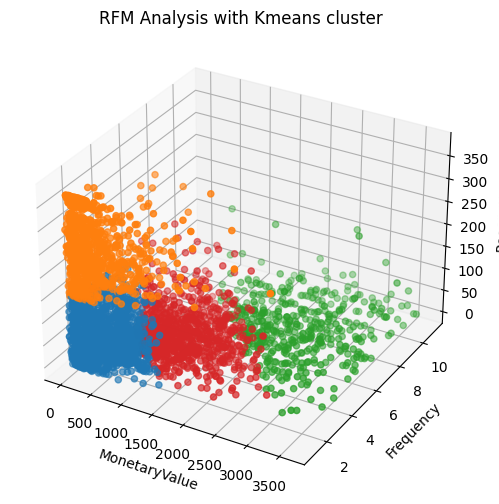

In [88]:
# non-outlier clustered data in scatterplot
cluster_colors={
    0:'#1f77b4',
    1:'#ff7f0e',
    2:'#2ca02c',
    3:'#d62728'}
colors=Non_Outlier_Data['Cluster'].map(cluster_colors)
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(projection='3d')
scatter=ax.scatter(Non_Outlier_Data['Monetary'],Non_Outlier_Data['Frequency'],Non_Outlier_Data['Recency'],c=colors)
ax.set_xlabel("MonetaryValue")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")
ax.set_title("RFM Analysis with Kmeans cluster")
plt.show()

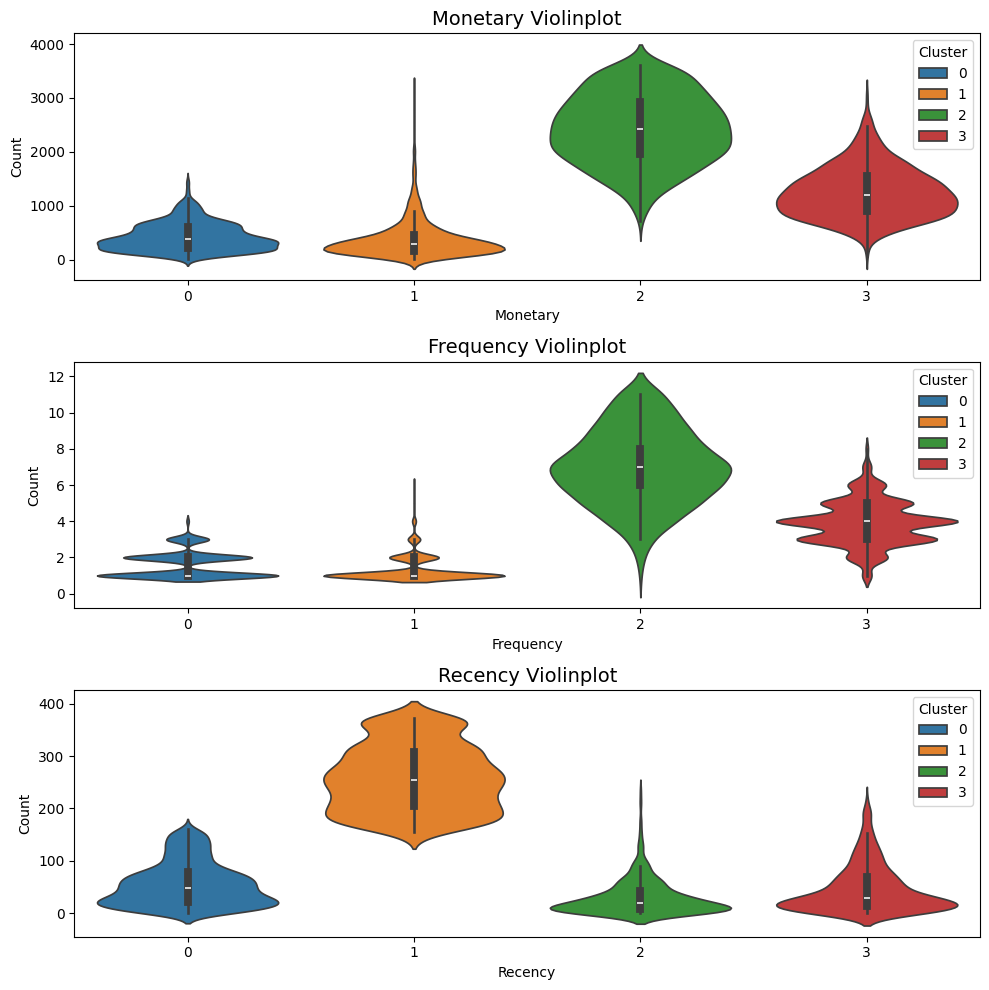

In [89]:
# non-outlier clustered data in violin plot
plt.figure(figsize=(10,10))
for index,name in enumerate(RFM_colums):
    plt.subplot(3,1,index+1)
    sns.violinplot(x=Non_Outlier_Data['Cluster'],y=Non_Outlier_Data[name],palette=cluster_colors,hue=Non_Outlier_Data['Cluster'])
    plt.title(f"{name} Violinplot",fontsize=14)
    plt.xlabel(f'{name}')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [90]:
# outlier data separation
_,M_Outlier_DF,F_Outlier_DF=non_outlier_calculation(RFM_data)
Overlap_Outlier_Index=M_Outlier_DF.index.intersection(F_Outlier_DF.index)
M_only_outliers=M_Outlier_DF.drop(Overlap_Outlier_Index)
F_only_outliers=F_Outlier_DF.drop(Overlap_Outlier_Index)
M_F_overlap_DF=M_Outlier_DF.loc[Overlap_Outlier_Index]

In [91]:
# Assigning cluster numbers to identify outlier data
M_only_outliers['Cluster']=-1
F_only_outliers['Cluster']=-2
M_F_overlap_DF['Cluster']=-3
outlier_DF=pd.concat([M_only_outliers,F_only_outliers,M_F_overlap_DF])
outlier_DF.head()


Monetary  Frequency  Recency  Cluster
0   77183.60          1      325       -1
1    4310.00          7        1       -1
10   6207.67          1       32       -1
12   6372.58          4       57       -1
15   4737.23         10        2       -1

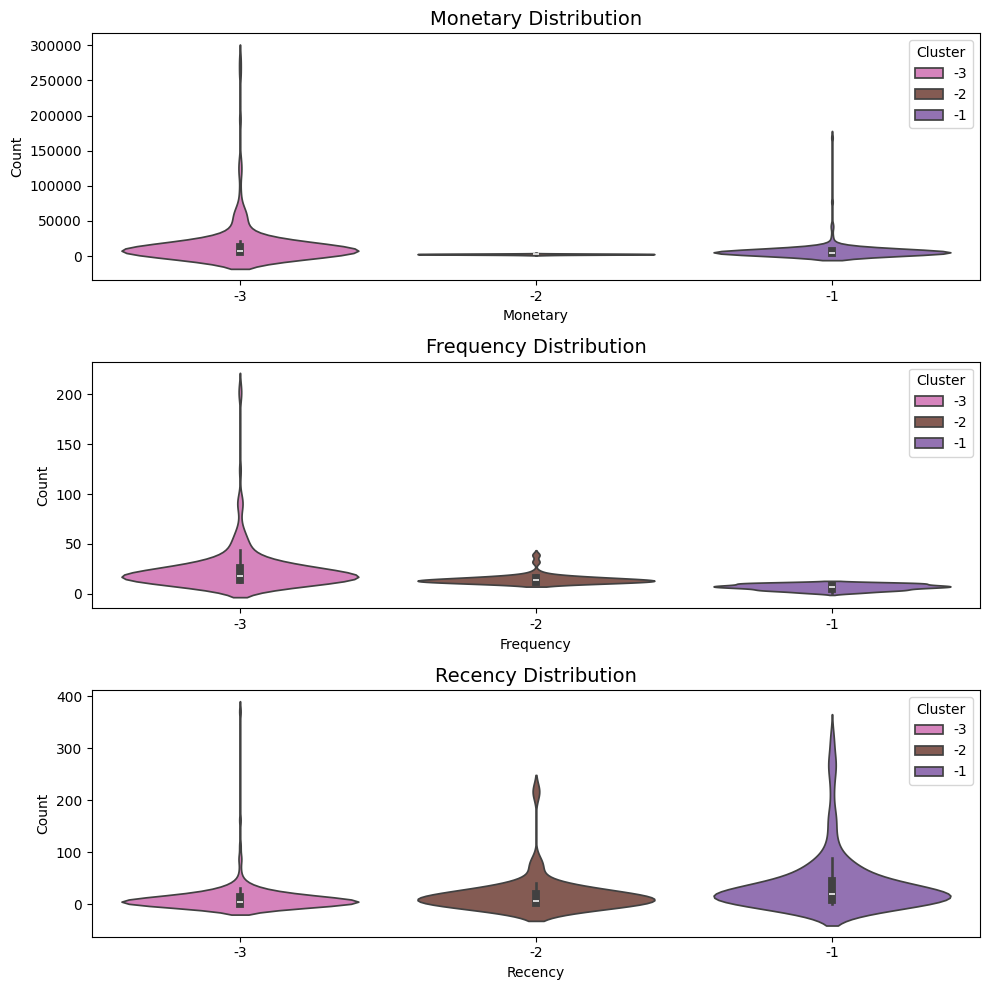

In [92]:
cluster_colors={
    -1:'#9467bd',
    -2:'#8c564b',
    -3:'#e377c2'}
plt.figure(figsize=(10,10))
for index,name in enumerate(RFM_colums):
    plt.subplot(3,1,index+1)
    sns.violinplot(x=outlier_DF['Cluster'],y=outlier_DF[name],palette=cluster_colors,hue=outlier_DF['Cluster'])
    plt.xlabel(f"{name}")
    plt.ylabel("Count")
    plt.title(f"{name} Distribution",fontsize=14)
plt.tight_layout()
plt.show()

In [93]:
cluster_name={
    0:"Recent Low Val",
    1:"Inactive",
    2:"Premium",
    3:"Moderate",
    -1:"Gold",
    -2:"Platinum",
    -3:"Super Platinum"
}
# outlier and nonoutlier data merging
full_cluster_df=pd.concat([Non_Outlier_Data,outlier_DF])
full_cluster_df

Monetary  Frequency  Recency  Cluster
2      1437.24          4       74        3
3      1457.55          1       18        0
4       294.40          1      309        1
5      1385.74          7       35        2
6        89.00          1      203        1
...        ...        ...      ...      ...
4248   7561.68         20       14       -3
4268   5425.56         17        3       -3
4287   6484.54         14        4       -3
4289   5509.12         12        2       -3
4293   7276.90         20       11       -3

[4334 rows x 4 columns]

In [94]:
full_cluster_df['ClusterLabel']=full_cluster_df['Cluster'].map(cluster_name)
full_cluster_df


Monetary  Frequency  Recency  Cluster    ClusterLabel
2      1437.24          4       74        3        Moderate
3      1457.55          1       18        0  Recent Low Val
4       294.40          1      309        1        Inactive
5      1385.74          7       35        2         Premium
6        89.00          1      203        1        Inactive
...        ...        ...      ...      ...             ...
4248   7561.68         20       14       -3  Super Platinum
4268   5425.56         17        3       -3  Super Platinum
4287   6484.54         14        4       -3  Super Platinum
4289   5509.12         12        2       -3  Super Platinum
4293   7276.90         20       11       -3  Super Platinum

[4334 rows x 5 columns]

In [95]:
full_cluster_df['Monetary_Val']=full_cluster_df['Monetary']/100
cluster_counts=full_cluster_df['ClusterLabel'].value_counts()
feature_means=full_cluster_df.groupby(by='ClusterLabel')[['Monetary_Val','Frequency','Recency']].mean()
cluster_counts.index

Index(['Recent Low Val', 'Inactive', 'Moderate', 'Premium', 'Super Platinum',
       'Gold', 'Platinum'],
      dtype='object', name='ClusterLabel')

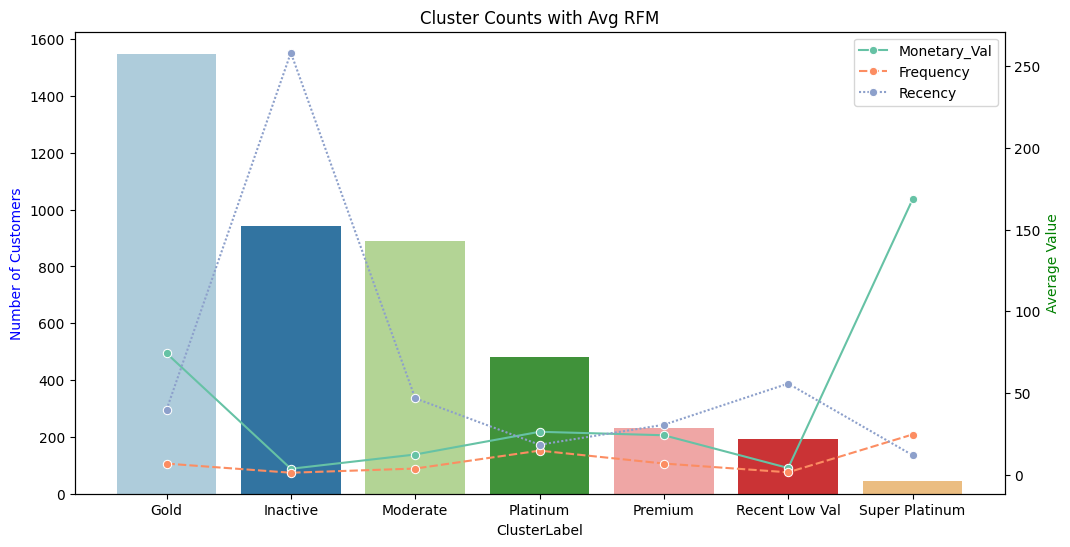

In [96]:
fig,ax1=plt.subplots(figsize=(12,6))
sns.barplot(x=cluster_counts.index,y=cluster_counts.values,ax=ax1,palette='Paired',hue=cluster_counts.index)
ax1.set_title("Cluster Counts with Avg RFM")
ax1.set_ylabel("Number of Customers",color='b')
ax2=ax1.twinx()
sns.lineplot(data=feature_means,ax=ax2,palette='Set2',marker='o')
ax2.set_ylabel('Average Value',color='g')
plt.show()